In [102]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# file = "/Users/poojasreepasupuleti/Documents/Datascience_projects/Tweetsdata.csv"
# df = pd.read_csv(file, encoding="utf-8")

In [106]:
file = "/Users/poojasreepasupuleti/Documents/Datascience_projects/Tweetsdata.csv"
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.45119332643138527,
 'language': 'Turkish'}

In [107]:
data = pd.read_csv(file,encoding='ISO-8859-1')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [109]:
# Finding number of missing values in each column of train data set
data_columns=[]
data_columns = data.columns.values
for column in data_columns:
    if(data[column].isnull().sum()>0):
        print(column,data[column].isnull().sum())

_last_judgment_at 50
gender 97
gender:confidence 26
description 3744
gender_gold 20000
profile_yn_gold 20000
tweet_coord 19891
tweet_location 7484
user_timezone 7798


In [110]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>0]
#step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values.\n')

_last_judgment_at 0.0025  % missing values.

gender 0.0048  % missing values.

gender:confidence 0.0013  % missing values.

description 0.1867  % missing values.

gender_gold 0.9975  % missing values.

profile_yn_gold 0.9975  % missing values.

tweet_coord 0.9921  % missing values.

tweet_location 0.3733  % missing values.

user_timezone 0.3889  % missing values.



In [111]:
data.dropna(subset=['gender'], inplace=True)

In [112]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               19953 non-null  int64  
 1   _golden                19953 non-null  bool   
 2   _unit_state            19953 non-null  object 
 3   _trusted_judgments     19953 non-null  int64  
 4   _last_judgment_at      19903 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      19953 non-null  float64
 7   profile_yn             19953 non-null  object 
 8   profile_yn:confidence  19953 non-null  float64
 9   created                19953 non-null  object 
 10  description            16224 non-null  object 
 11  fav_number             19953 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             19953 non-null  object 
 14  name                   19953 non-null  object 
 15  pr

In [114]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

In [115]:
data['tweet_created']

0       2015-10-26 12:40:00
1       2015-10-26 12:40:00
2       2015-10-26 12:40:00
3       2015-10-26 12:40:00
4       2015-10-26 12:40:00
                ...        
20045   2015-10-26 13:20:00
20046   2015-10-26 12:40:00
20047   2015-10-26 13:20:00
20048   2015-10-26 12:40:00
20049   2015-10-26 13:19:00
Name: tweet_created, Length: 19953, dtype: datetime64[ns]

In [117]:
# data['hour'] = data['tweet_created'].dt.hour

In [129]:
data['hour'] = data['tweet_created'].dt.strftime('%H:%M')

In [130]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,hour
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,2015-10-26 12:40:00,6.587300e+17,main; @Kan1shk3,Chennai,12:40
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,2015-10-26 12:40:00,6.587300e+17,NaN,Eastern Time (US & Canada),12:40
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,2015-10-26 12:40:00,6.587300e+17,clcncl,Belgrade,12:40
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,2015-10-26 12:40:00,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),12:40
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,2015-10-26 12:40:00,6.587300e+17,NaN,NaN,12:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,2015-10-26 13:20:00,6.587400e+17,Verona ªÁ,NaN,13:20
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,2015-10-26 12:40:00,6.587300e+17,"Kansas City, MO",NaN,12:40
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,2015-10-26 13:20:00,6.587400e+17,Lagos Nigeria,NaN,13:20
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,2015-10-26 12:40:00,6.587300e+17,Texas Hill Country,NaN,12:40


In [131]:
new_df = data.loc[:, ['gender', 'hour']]

In [132]:
new_df

,gender,hour
0,male,12:40
1,male,12:40
2,male,12:40
3,male,12:40
4,female,12:40
...,...,...
20045,female,13:20
20046,male,12:40
20047,male,13:20
20048,female,12:40


The below code gives average hour of sleep for each gender. We can then compare these values to determine which gender is sleeping late.

In [133]:
# extract hour from 'hour' column
data['hour'] = data['hour'].apply(lambda x: int(x.split(':')[0]))

# calculate average hour of sleep for each gender
df_grouped = data.groupby('gender')['hour'].mean()
print(df_grouped)

gender
brand      12.412824
female     12.577313
male       12.509364
unknown    12.452104
Name: hour, dtype: float64


This suggests that females tend to sleep slightly later on average than males, while individuals with gender labeled as brand (which is likely a non-binary gender) tend to sleep earlier than both males and females.

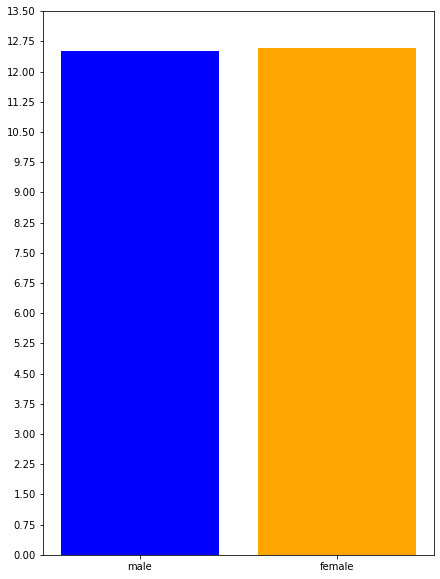

In [98]:
import matplotlib.pyplot as plt

# slice df_grouped to get only 'male' and 'female' rows
df_grouped_mf = df_grouped.loc[['male', 'female']]

# create bar plot
fig, ax = plt.subplots(figsize=(1,10))
ax.bar(df_grouped_mf.index, df_grouped_mf.values, color=['blue', 'orange'])
# ax.set_title('Average Hour of Sleep by Gender (Male and Female only)')
# ax.set_ylabel('Hour of Sleep', labelpad=0.5)
#  y = np.linspace(-15, 15, 100)
# ax.set_ylim(0, 25)
ax.set_yticks(np.arange(0, 14, 0.75))

plt.show()

If a female is consistently sleeping later than her natural circadian rhythm, it could potentially have negative effects on her overall health and well-being, including disruption of hormones and metabolic processes, and increased risk of various health problems.